## loading libraries

In [37]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

## load loan data

In [38]:
loan_df = pd.read_csv('loan.csv')
loan_df

C:\Users\rakes\AppData\Local\Temp\ipykernel_10508\3632592007.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtering Useful Columns

1. `id` A unique LC assigned ID for the loan listing.
2. `term` How many months will be paid for the loan
3. `int_rate` Interest Rate on loan
4. `installment` Monthly amount borrower paying
5. `grade` Quality score to a loan based on a borrower's credit history
6. `loan_amnt` loan amount requested
7. `funded_amnt` funded amount by the company
8. `funded_amnt_inv` funded amount but invester
9. `loan_status` current status of the loan 
10. `dti` Debt to income ratio
11. `home_ownership` Type of ownership of borrower house
12. `issue_d` Date of funded
13. `verification_status` status of verfication in lending club 

In [39]:
loan_df = loan_df[['id','loan_amnt','funded_amnt','funded_amnt_inv',
                   'term','int_rate','installment','grade','sub_grade',
                   'emp_title','emp_length','home_ownership','annual_inc',
                   'verification_status','issue_d','loan_status','purpose',
                   'addr_state','dti']]

loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72


## check for duplicate records

##### No Duplicates found

In [40]:
loan_df[loan_df['id'].duplicated()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti


## check Datatypes

##### Observations:
- `interest_rate` taken as an object but should be float
- `term` taken as an object should be int
- `issue_d` taken as object should be date
- `emp_title` & `employee_length` has 

In [41]:
print(loan_df.dtypes)
print(loan_df.isnull().sum())

id                       int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object
id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue

In [42]:
#cleaning the emp_length with 0 as data not available
loan_df['emp_length'].fillna('0',inplace=True)
#clening the emp_title with No comp Det
loan_df['emp_title'].fillna('No Comp Details', inplace = True)

C:\Users\rakes\AppData\Local\Temp\ipykernel_10508\1237626911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['emp_length'].fillna('0',inplace=True)
C:\Users\rakes\AppData\Local\Temp\ipykernel_10508\1237626911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['emp_title'].fillna('No Comp Details', inplace = True)


In [43]:
import re

def extract_int_from_string(val):
    x =re.findall('\d+',val) 
    return int(x[0])

In [44]:
#formatting emp_length as integer
loan_df['emp_length'] = loan_df['emp_length'].apply(extract_int_from_string)
#formatting int_rate
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x.replace('%','')))
#formatting term
loan_df['term'] = loan_df['term'].apply(extract_int_from_string)
#formatting issue_d to year and month
loan_df['year'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y').dt.year
loan_df['month'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y').dt.month
#dropping issue_d as not required
loan_df.drop('issue_d',axis=1)
#reverifying data types and looks good
loan_df.dtypes

C:\Users\rakes\AppData\Local\Temp\ipykernel_10508\1724303173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['emp_length'] = loan_df['emp_length'].apply(extract_int_from_string)
C:\Users\rakes\AppData\Local\Temp\ipykernel_10508\1724303173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x.replace('%','')))
C:\Users\rakes\AppData\Local\Temp\ipykernel_10508\1724303173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

id                       int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                     int64
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length               int64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
year                     int64
month                    int64
dtype: object

### Univariant Analysis for funded_amnt_inv, int_rate, annual_inc, grade, emp_title, loan_status, vertification_status

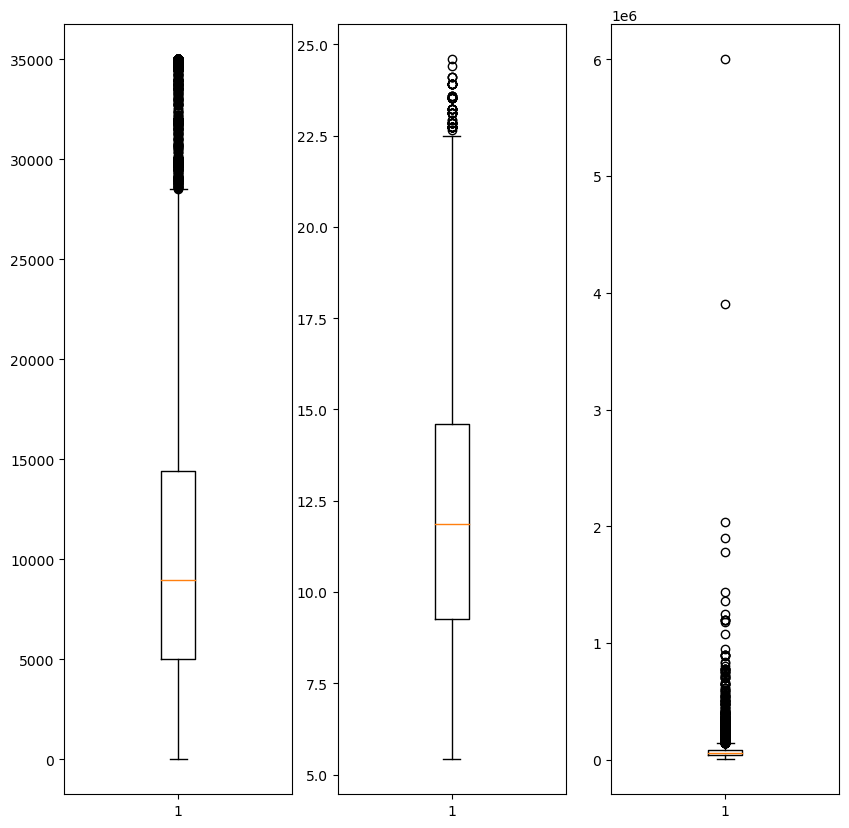

6000000.0

In [45]:
figure, axis = plt.subplots(1,3)

figure.set_figheight(10)
figure.set_figwidth(10)

axis[0].boxplot(loan_df.funded_amnt_inv)
axis[1].boxplot(loan_df.int_rate)
axis[2].boxplot(loan_df.annual_inc)
plt.show()

loan_df.annual_inc.max()

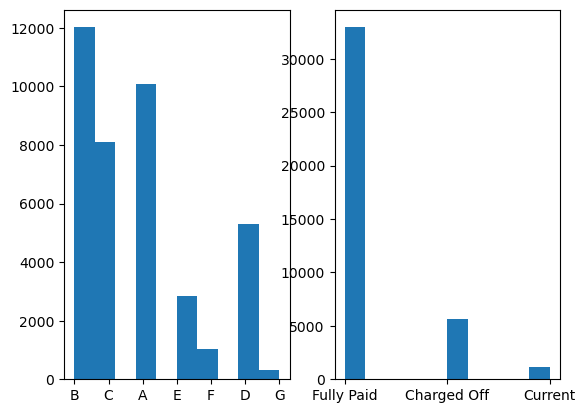

In [46]:
figure, axis = plt.subplots(1,2)
axis[0].hist(loan_df.grade, bins=10)
axis[1].hist(loan_df.loan_status, bins=10)
plt.show()

Not Verified       42.603923
Verified           32.250674
Source Verified    25.145404
Name: verification_status, dtype: float64


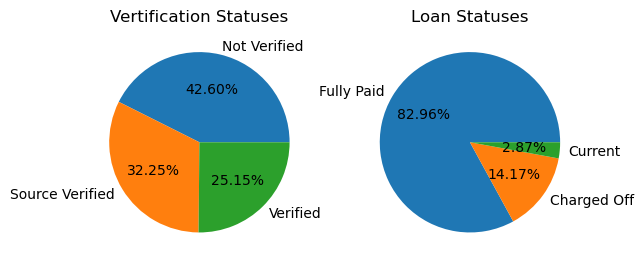

In [47]:
figure, axis = plt.subplots(1,2)

pie_verifi_status_data = (loan_df.verification_status.value_counts()*100)/len(loan_df)
print(pie_verifi_status_data)
labels = ['Not Verified','Source Verified','Verified']
axis[0].title.set_text('Vertification Statuses')
axis[0].pie(pie_verifi_status_data, labels=labels,autopct='%1.2f%%')

pie_status_data = (loan_df.loan_status.value_counts()*100)/len(loan_df)
labels = ['Fully Paid', 'Charged Off', 'Current']
axis[1].title.set_text('Loan Statuses')
axis[1].pie(pie_status_data, labels=labels,autopct='%1.2f%%')

plt.show()

### Insights
- most frequent loans that approved by investors are from 4000 to 12000
- most frequent interest rate that are given are from 9 to 14 and there are outliers with up to 25%
- most requested loans are from Grade B,C,A,D
- very less number of records for current has most about the **Fully Paid** and **Charged Off**
- there are more number of not verified accounts compared to other verified accounts
- there are 82.96% of fully paid loan and 14.17% of charged off loans
- outliers present in **annual_inc**

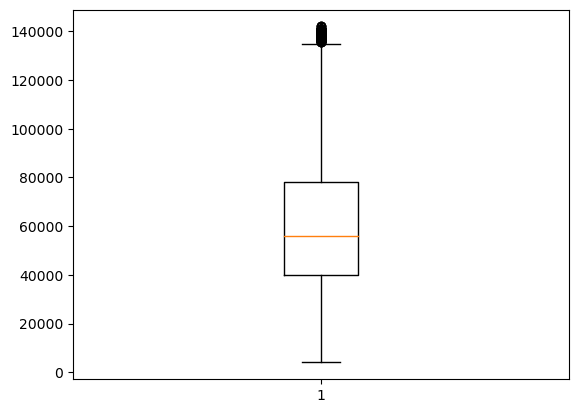

141996.0

In [48]:
#removing the outlier in of annual_inc and filter records up to only 95% of max percentile
loan_df = loan_df[loan_df.annual_inc < np.percentile(loan_df.annual_inc,95)]
loan_df.annual_inc.describe()
plt.boxplot(loan_df.annual_inc)
plt.show()
loan_df.annual_inc.max()